<a href="https://colab.research.google.com/github/DewanSK/DL-CNN/blob/main/ANN_Car_Sales_Price_PredictionDewan_S_Khan4220105630741.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Lasso

In [2]:
df=pd.read_csv("/content/car_purchasing.csv",encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382


In [7]:
y=y.values.reshape(-1,1)

In [60]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example data
#x = np.array([1, 2, 3, 4, 5])  # Replace with your actual input features
#y = np.array([10, 20, 30, 40, 50])  # Replace with your actual target variable

# Reshape x and y if needed (required for scikit-learn)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create MinMaxScaler instances
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the input features
x_scaled = scaler_x.fit_transform(x)

# Fit and transform the target variable
y_scaled = scaler_y.fit_transform(y)

# If you want to inverse transform the scaled data back to the original scale later
# x_original = scaler_x.inverse_transform(x_scaled)
# y_original = scaler_y.inverse_transform(y_scaled)



In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,shuffle=True,random_state=42)
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [62]:
lr_model.score(x_train,y_train)

1.0

In [63]:
lr_pred=lr_model.predict(x_test)

In [66]:
print(mean_squared_error(y_test,lr_pred))

5.048709793414476e-29


In [67]:
print(r2_score(y_test,lr_pred))

nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [68]:
#lasso.score(x_train)
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming x_train and y_train are your training data
# Assuming x_test and y_test are your testing data

# Scale the data if needed
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train the Lasso model
lasso = Lasso(alpha=0.1)  # You should choose an appropriate value for alpha
lasso.fit(x_train_scaled, y_train)

# Evaluate the model on the training set
train_score = lasso.score(x_train_scaled, y_train)

# Evaluate the model on the testing set
test_score = lasso.score(x_test_scaled, y_test)

print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")


Training Score: 0.9996656326530612
Testing Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [69]:
lasso_pred=lasso.predict(x_test)

In [70]:
print(mean_squared_error(y_test,lasso_pred))

4753.905502040818


In [71]:
print(r2_score(y_test,lasso_pred))

nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [72]:
ridge=Ridge(alpha=.001)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001)

In [73]:
ridge.score(x_train,y_train)

0.9999999869417604

In [74]:
ridge_pred=ridge.predict(x_test)

In [75]:
print(mean_squared_error(y_test,ridge_pred))

2.0403499341836883e-06


In [76]:
print(r2_score(y_test,ridge_pred))

nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


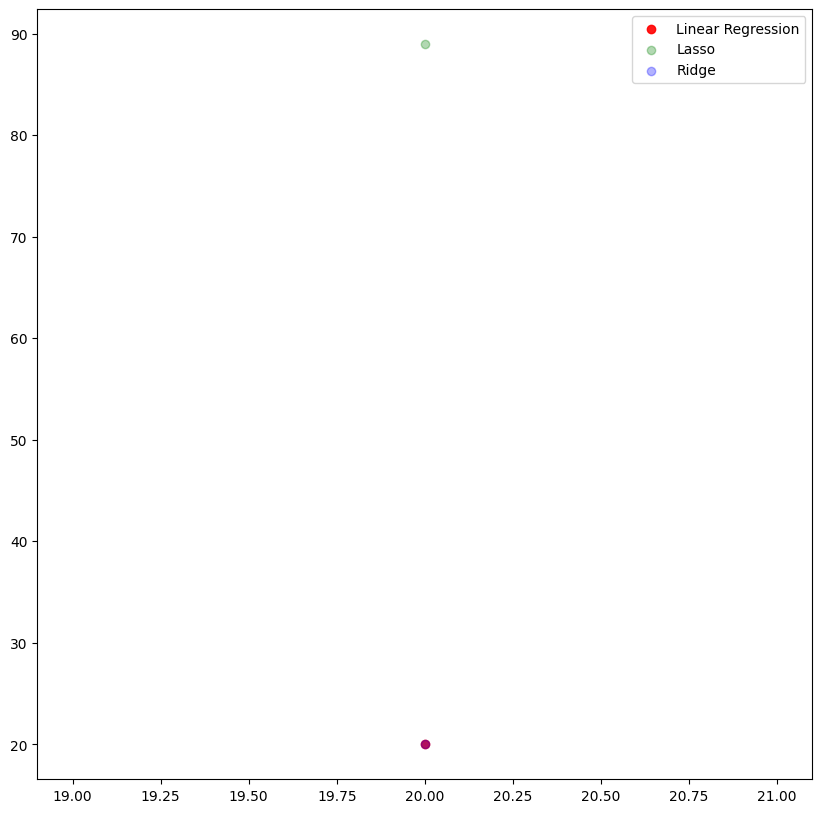

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,lr_pred,c='r',alpha=.9,label='Linear Regression')
plt.scatter(y_test,lasso_pred,c='g',alpha=.3,label='Lasso')
plt.scatter(y_test,ridge_pred,c='b',alpha=.3,label='Ridge')
plt.legend()
plt.show()